# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [1]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import matplotlib.pyplot as plt
import json

#opening the yearinfo.json file and assigning it to a variable 'file'.
#loading the file using json load() to load the file in yearinfo variable.
with open('/home/cheki/Documents/GCIT/6th Semester/ITS307/Assignment1/yearinfo.json') as file:
  yearinfo = json.load(file)

yearinfo


{'2010': [{'band_singer': ['Kesha'],
   'song': ['/wiki/Tik_Tok_(song)'],
   'songurl': ['Tik Tok (song)'],
   'ranking': 1,
   'titletext': '"Tik Tok"',
   'url': ['/wiki/Kesha']},
  {'band_singer': ['Lady Antebellum'],
   'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'],
   'songurl': ['Need You Now (Lady Antebellum song)'],
   'ranking': 2,
   'titletext': '"Need You Now"',
   'url': ['/wiki/Lady_Antebellum']},
  {'band_singer': ['Train (band)'],
   'song': ['/wiki/Hey,_Soul_Sister'],
   'songurl': ['Hey, Soul Sister'],
   'ranking': 3,
   'titletext': '"Hey, Soul Sister"',
   'url': ['/wiki/Train_(band)']},
  {'band_singer': ['Katy Perry', 'Snoop Dogg'],
   'song': ['/wiki/California_Gurls'],
   'songurl': ['California Gurls'],
   'ranking': 4,
   'titletext': '"California Gurls"',
   'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']},
  {'band_singer': ['Usher (musician)', 'Will.i.am'],
   'song': ['/wiki/OMG_(Usher_song)'],
   'songurl': ['OMG (Usher song)'],
   'ranking': 5,


### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

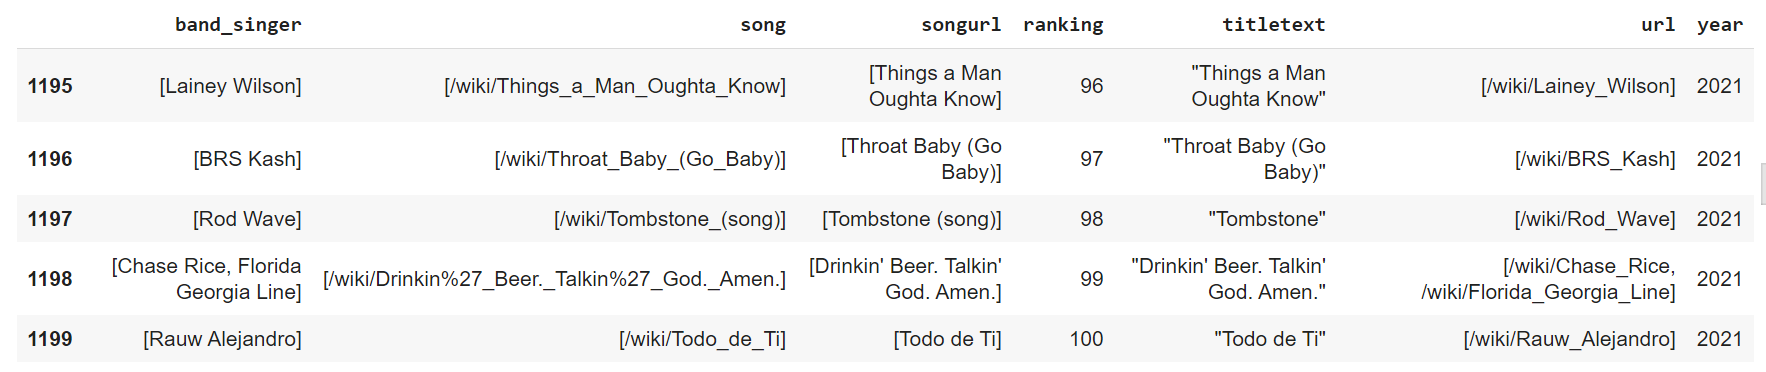

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [2]:
#index of yearinfo dictionry/ total number of years
yearinfo.keys()

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [3]:
#values of yearinfo dictionary
yearinfo.values()

dict_values([[{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am'

In [4]:
#number of songs in 2010
len(yearinfo['2010'])

100

In [5]:
#list of key,value in yearinfo
#displays values of eacch particular year
yearinfo.items()

dict_items([('2010', [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Wi

In [6]:
#getting the column names by getting the keys of year 2010
yearinfo['2010'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [7]:
#creating column names to create the dataframe
#adding another key ('Year')
column_names = list(yearinfo['2010'][0].keys())+(['Year'])
column_names

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'Year']

In [8]:
#empty list for storing the data
data_list = []

#appendinf the data to the list using loop
for key, value in yearinfo.items():
    for index in value:
        var = list(index.values())+[key]
        data_list.append(var)

In [9]:
#creating dataframe from above list
df = pd.DataFrame(data_list,columns=column_names)
df.tail()

band_singer  \
1195                     [Lainey Wilson]   
1196                          [BRS Kash]   
1197                          [Rod Wave]   
1198  [Chase Rice, Florida Georgia Line]   
1199                    [Rauw Alejandro]   

                                               song  \
1195               [/wiki/Things_a_Man_Oughta_Know]   
1196                  [/wiki/Throat_Baby_(Go_Baby)]   
1197                       [/wiki/Tombstone_(song)]   
1198  [/wiki/Drinkin%27_Beer._Talkin%27_God._Amen.]   
1199                             [/wiki/Todo_de_Ti]   

                                  songurl  ranking  \
1195           [Things a Man Oughta Know]       96   
1196              [Throat Baby (Go Baby)]       97   
1197                   [Tombstone (song)]       98   
1198  [Drinkin' Beer. Talkin' God. Amen.]       99   
1199                         [Todo de Ti]      100   

                                titletext  \
1195           "Things a Man Oughta Know"   
1196              "Throat Baby (Go Baby)"   
1197                          "Tombstone"   
1198  "Drinkin' Beer. Talkin' God. Amen."   
1199                         "Todo de Ti"   

                                                 url  Year  
1195                           [/wiki/Lainey_Wilson]  2021  
1196                                [/wiki/BRS_Kash]  2021  
1197                                [/wiki/Rod_Wave]  2021  
1198  [/wiki/Chase_Rice, /wiki/Florida_Georgia_Line]  2021  
1199                          [/wiki/Rauw_Alejandro]  2021

In [10]:
#dimentionality of the dataframe
df.shape

(1200, 7)

In [11]:
#function to create proper format for the values of each column
def column_list(lists):
    column_value = lists[0]
    return column_value

#creating proper formats for the values of some of the columns
df['band_singer'] = df.band_singer.map(column_list)
df['song'] = df.song.map(column_list)
df['songurl'] = df.songurl.map(column_list)
df['url'] = df.url.map(column_list)



In [12]:
df.head(10)

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   
5             B.o.B                     /wiki/Airplanes_(song)   
6            Eminem                 /wiki/Love_the_Way_You_Lie   
7         Lady Gaga                          /wiki/Bad_Romance   
8         Taio Cruz            /wiki/Dynamite_(Taio_Cruz_song)   
9         Taio Cruz                     /wiki/Break_Your_Heart   

                               songurl  ranking               titletext  \
0                       Tik Tok (song)        1               "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2          "Need You Now"   
2                     Hey, Soul Sister        3      "Hey, Soul Sister"   
3                     California Gurls        4      "California Gurls"   
4                     OMG (Usher song)        5                   "OMG"   
5                     Airplanes (song)        6             "Airplanes"   
6                 Love the Way You Lie        7  "Love the Way You Lie"   
7                          Bad Romance        8           "Bad Romance"   
8            Dynamite (Taio Cruz song)        9              "Dynamite"   
9                     Break Your Heart       10      "Break Your Heart"   

                      url  Year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010  
5             /wiki/B.o.B  2010  
6            /wiki/Eminem  2010  
7         /wiki/Lady_Gaga  2010  
8         /wiki/Taio_Cruz  2010  
9         /wiki/Taio_Cruz  2010

In [13]:
#columns label of the dataframe
df.columns

Index(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url',
       'Year'],
      dtype='object')

In [14]:
#number of not empty values for each row/column
df.count()

band_singer    1200
song           1200
songurl        1200
ranking        1200
titletext      1200
url            1200
Year           1200
dtype: int64

In [15]:
#datatypes of each column
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
Year           object
dtype: object

In [16]:
#Converting the datatype of year to int
df = df.astype({"Year": 'int'})
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
Year            int64
dtype: object

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [17]:
#using value_counts to count the number of times each singer appeared on this chart
df.value_counts(subset=['band_singer'])[:50]

band_singer         
Drake (musician)        26
Maroon 5                21
Rihanna                 21
Ariana Grande           20
Taylor Swift            19
The Weeknd              16
Katy Perry              14
Chris Brown             14
Justin Bieber           14
Post Malone             13
Ed Sheeran              13
Imagine Dragons         12
Shawn Mendes            11
Bruno Mars              11
Adele                   11
Lady Gaga               11
Cardi B                 10
Usher (musician)        10
Calvin Harris           10
Jason Derulo            10
Lil Baby                10
Luke Combs               9
Luke Bryan               9
Kesha                    9
DJ Khaled                8
Selena Gomez             8
Pink (singer)            8
Nicki Minaj              8
Jason Aldean             8
Meghan Trainor           8
Khalid (singer)          7
Billie Eilish            7
David Guetta             7
Lil Wayne                7
Florida Georgia Line     7
Flo Rida                 7
Drake (

<function matplotlib.pyplot.show(close=None, block=None)>

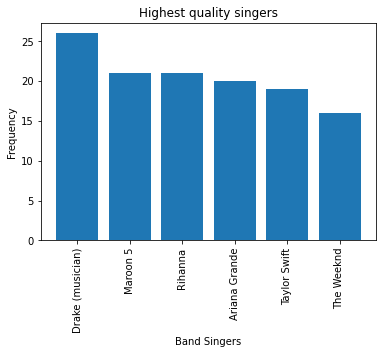

In [18]:
highest_quality = df.band_singer.value_counts().loc[lambda x : x > 15]

y = highest_quality
x = y.index
plt.bar(x,y)
plt.title("Highest quality singers")
plt.xlabel("Band Singers")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show

**Question: Who is the most profilic singer?**
**Answer: Drake is the most profilic singer. He appeared in 26 different songs.**

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [19]:
#write your code here
newdf = df.copy()
newdf.head()


band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  Year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

In [20]:
#function to return the score of each singers based on ranking
def get_ranking(ranking):
  score = 101 - ranking
  return score

In [21]:
#creating a score column
newdf['score'] = newdf.ranking.map(get_ranking)
newdf.head(5)

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  Year  score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96

In [22]:
# Sorting score column
newdf.sort_values(['score'],ascending = False, inplace = True)
newdf.head(10)

band_singer                                  song  \
0                       Kesha                  /wiki/Tik_Tok_(song)   
100                     Adele             /wiki/Rolling_in_the_Deep   
1100                 Dua Lipa               /wiki/Levitating_(song)   
1000               The Weeknd                 /wiki/Blinding_Lights   
900                 Lil Nas X                   /wiki/Old_Town_Road   
800          Drake (musician)             /wiki/God%27s_Plan_(song)   
700                Ed Sheeran                    /wiki/Shape_of_You   
500               Mark Ronson                     /wiki/Uptown_Funk   
400         Pharrell Williams  /wiki/Happy_(Pharrell_Williams_song)   
300   Macklemore & Ryan Lewis                     /wiki/Thrift_Shop   

                             songurl  ranking              titletext  \
0                     Tik Tok (song)        1              "Tik Tok"   
100              Rolling in the Deep        1  "Rolling in the Deep"   
1100               Levitating (song)        1           "Levitating"   
1000                 Blinding Lights        1      "Blinding Lights"   
900                    Old Town Road        1        "Old Town Road"   
800                God's Plan (song)        1           "God's Plan"   
700                     Shape of You        1         "Shape of You"   
500                      Uptown Funk        1          "Uptown Funk"   
400   Happy (Pharrell Williams song)        1                "Happy"   
300                      Thrift Shop        1          "Thrift Shop"   

                                  url  Year  score  
0                         /wiki/Kesha  2010    100  
100                       /wiki/Adele  2011    100  
1100                   /wiki/Dua_Lipa  2021    100  
1000                 /wiki/The_Weeknd  2020    100  
900                   /wiki/Lil_Nas_X  2019    100  
800            /wiki/Drake_(musician)  2018    100  
700                  /wiki/Ed_Sheeran  2017    100  
500                 /wiki/Mark_Ronson  2015    100  
400           /wiki/Pharrell_Williams  2014    100  
300   /wiki/Macklemore_%26_Ryan_Lewis  2013    100

In [23]:
# Total score of band_singer
newdf = newdf.groupby('band_singer').sum()
newdf.head(10)

ranking  Year  score
band_singer                                 
2 Chainz                    153  4025     49
21 Savage                    90  4036    112
24kGoldn                     51  4041    151
3OH!3                        73  2010     28
5 Seconds of Summer         248  8065    156
6ix9ine                      87  4036    115
A Boogie wit da Hoodie      204  6055     99
A Great Big World            17  2014     84
AJR (band)                   56  2021     45
ASAP Ferg                    74  2018     27

In [24]:
#sorting the band_singers based on their score
scores = newdf.sort_values(by = 'score', ascending = False)
# Selecting Top 20 singers
scores = scores['score'][:20]


<function matplotlib.pyplot.show(close=None, block=None)>

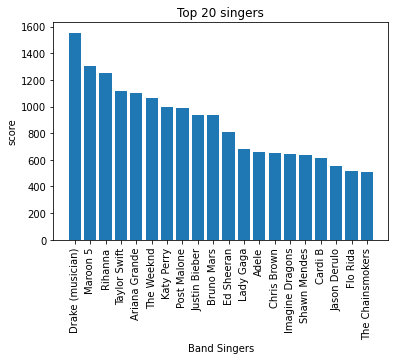

In [25]:
y=scores
x=y.index
plt.bar(x,y)
plt.title("Top 20 singers")
plt.xlabel("Band Singers")
plt.ylabel("score")
plt.xticks(rotation=90)
plt.show

**Question:Do you notice any major differences when you change the metric? 
How have the singers at the top shifted places? Why do you think this happens?**

**Answers: Yes, there are some changes in the highest profilic singers when we change the metric. This is because, in the first case, we took the highest profilic singers as the one who appeared most on the chart. In the second case, we took ranking column and added score column to the dataset which contains the scores of each singers based on the ranking.

This process of determining the highest profilic singers seems more reasonable because the singers shoukd be judged based on the ranking or the score that they got rather than those who appeared more on the chart. 

This will be more reasonable to measure a higher quality singer. Singer should be scored higher if the singer appears higher in the rankings. So we are sayin a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking. Therefore, we can say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.**

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

Determining the best singer of each year based on ranking.

In [26]:
df.head(10)

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   
5             B.o.B                     /wiki/Airplanes_(song)   
6            Eminem                 /wiki/Love_the_Way_You_Lie   
7         Lady Gaga                          /wiki/Bad_Romance   
8         Taio Cruz            /wiki/Dynamite_(Taio_Cruz_song)   
9         Taio Cruz                     /wiki/Break_Your_Heart   

                               songurl  ranking               titletext  \
0                       Tik Tok (song)        1               "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2          "Need You Now"   
2                     Hey, Soul Sister        3      "Hey, Soul Sister"   
3                     California Gurls        4      "California Gurls"   
4                     OMG (Usher song)        5                   "OMG"   
5                     Airplanes (song)        6             "Airplanes"   
6                 Love the Way You Lie        7  "Love the Way You Lie"   
7                          Bad Romance        8           "Bad Romance"   
8            Dynamite (Taio Cruz song)        9              "Dynamite"   
9                     Break Your Heart       10      "Break Your Heart"   

                      url  Year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010  
5             /wiki/B.o.B  2010  
6            /wiki/Eminem  2010  
7         /wiki/Lady_Gaga  2010  
8         /wiki/Taio_Cruz  2010  
9         /wiki/Taio_Cruz  2010

In [27]:
yeardf = df.groupby('Year', sort=False)
yeardf

In [28]:
yeardf.size()

Year
2010    100
2011    100
2012    100
2013    100
2014    100
2015    100
2016    100
2017    100
2018    100
2019    100
2020    100
2021    100
dtype: int64

In [29]:
yeardf.first()

band_singer                                  song  \
Year                                                                  
2010                    Kesha                  /wiki/Tik_Tok_(song)   
2011                    Adele             /wiki/Rolling_in_the_Deep   
2012                    Gotye    /wiki/Somebody_That_I_Used_to_Know   
2013  Macklemore & Ryan Lewis                     /wiki/Thrift_Shop   
2014        Pharrell Williams  /wiki/Happy_(Pharrell_Williams_song)   
2015              Mark Ronson                     /wiki/Uptown_Funk   
2016            Justin Bieber                   /wiki/Love_Yourself   
2017               Ed Sheeran                    /wiki/Shape_of_You   
2018         Drake (musician)             /wiki/God%27s_Plan_(song)   
2019                Lil Nas X                   /wiki/Old_Town_Road   
2020               The Weeknd                 /wiki/Blinding_Lights   
2021                 Dua Lipa               /wiki/Levitating_(song)   

                             songurl  ranking                       titletext  \
Year                                                                            
2010                  Tik Tok (song)        1                       "Tik Tok"   
2011             Rolling in the Deep        1           "Rolling in the Deep"   
2012    Somebody That I Used to Know        1  "Somebody That I Used to Know"   
2013                     Thrift Shop        1                   "Thrift Shop"   
2014  Happy (Pharrell Williams song)        1                         "Happy"   
2015                     Uptown Funk        1                   "Uptown Funk"   
2016                   Love Yourself        1                 "Love Yourself"   
2017                    Shape of You        1                  "Shape of You"   
2018               God's Plan (song)        1                    "God's Plan"   
2019                   Old Town Road        1                 "Old Town Road"   
2020                 Blinding Lights        1               "Blinding Lights"   
2021               Levitating (song)        1                    "Levitating"   

                                  url  
Year                                   
2010                      /wiki/Kesha  
2011                      /wiki/Adele  
2012                      /wiki/Gotye  
2013  /wiki/Macklemore_%26_Ryan_Lewis  
2014          /wiki/Pharrell_Williams  
2015                /wiki/Mark_Ronson  
2016              /wiki/Justin_Bieber  
2017                 /wiki/Ed_Sheeran  
2018           /wiki/Drake_(musician)  
2019                  /wiki/Lil_Nas_X  
2020                 /wiki/The_Weeknd  
2021                   /wiki/Dua_Lipa

In [30]:
yeardf.last()

band_singer                                               song  \
Year                                                                       
2010   Jerrod Niemann                                 /wiki/Lover,_Lover   
2011         Big Sean                                      /wiki/My_Last   
2012      Linkin Park              /wiki/Burn_It_Down_(Linkin_Park_song)   
2013         Paramore                               /wiki/Still_Into_You   
2014      Miley Cyrus                 /wiki/Adore_You_(Miley_Cyrus_song)   
2015    Calvin Harris  /wiki/How_Deep_Is_Your_Love_(Calvin_Harris_and...   
2016    One Direction                 /wiki/Perfect_(One_Direction_song)   
2017      Keith Urban               /wiki/The_Fighter_(Keith_Urban_song)   
2018  Imagine Dragons              /wiki/Believer_(Imagine_Dragons_song)   
2019       Juice Wrld                    /wiki/Robbery_(Juice_Wrld_song)   
2020       NLE Choppa                                 /wiki/Walk_Em_Down   
2021   Rauw Alejandro                                   /wiki/Todo_de_Ti   

                                                songurl  ranking  \
Year                                                               
2010                                       Lover, Lover      100   
2011                                            My Last      100   
2012                    Burn It Down (Linkin Park song)      100   
2013                                     Still Into You      100   
2014                       Adore You (Miley Cyrus song)      100   
2015  How Deep Is Your Love (Calvin Harris and Disci...      100   
2016                       Perfect (One Direction song)      100   
2017                     The Fighter (Keith Urban song)      100   
2018                    Believer (Imagine Dragons song)      100   
2019                          Robbery (Juice Wrld song)      100   
2020                                       Walk Em Down      100   
2021                                         Todo de Ti      100   

                    titletext                    url  
Year                                                  
2010           "Lover, Lover"   /wiki/Jerrod_Niemann  
2011                "My Last"         /wiki/Big_Sean  
2012           "Burn It Down"      /wiki/Linkin_Park  
2013         "Still Into You"         /wiki/Paramore  
2014              "Adore You"      /wiki/Miley_Cyrus  
2015  "How Deep Is Your Love"    /wiki/Calvin_Harris  
2016                "Perfect"    /wiki/One_Direction  
2017            "The Fighter"      /wiki/Keith_Urban  
2018               "Believer"  /wiki/Imagine_Dragons  
2019                "Robbery"       /wiki/Juice_Wrld  
2020           "Walk Em Down"       /wiki/NLE_Choppa  
2021             "Todo de Ti"   /wiki/Rauw_Alejandro

In [31]:
yeardf.groups

{2010: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 2011: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199], 2012: [200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 2

In [32]:
year = yeardf.get_group(2010)
year.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  Year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

In [33]:
yeardf.max()

band_singer                                         song  \
Year                                                                
2010     Young Money                   /wiki/Your_Love_Is_My_Drug   
2011  Zac Brown Band                        /wiki/You_and_Tequila   
2012     Wiz Khalifa                   /wiki/Young,_Wild_%26_Free   
2013            Zedd       /wiki/Wrecking_Ball_(Miley_Cyrus_song)   
2014            Zedd       /wiki/Wrecking_Ball_(Miley_Cyrus_song)   
2015   X Ambassadors                   /wiki/You_Know_You_Like_It   
2016      Zayn Malik                  /wiki/Work_from_Home_(song)   
2017            Zedd                   /wiki/Young_Dumb_%26_Broke   
2018            Zedd  /wiki/Youngblood_(5_Seconds_of_Summer_song)   
2019      Young Thug                            /wiki/Zeze_(song)   
2020      Young Thug             /wiki/Yummy_(Justin_Bieber_song)   
2021       Yung Bleu                              /wiki/You_Right   

                                    songurl  ranking               titletext  \
Year                                                                           
2010                   Your Love Is My Drug      100             "Your Love"   
2011                        You and Tequila      100             "Yoü and I"   
2012                     Young, Wild & Free      100    "Young, Wild & Free"   
2013       Wrecking Ball (Miley Cyrus song)      100         "Wrecking Ball"   
2014       Wrecking Ball (Miley Cyrus song)      100         "Wrecking Ball"   
2015                   You Know You Like It      100  "You Know You Like It"   
2016                  Work from Home (song)      100                  "Work"   
2017                     Young Dumb & Broke      100                  "iSpy"   
2018  Youngblood (5 Seconds of Summer song)      100            "Youngblood"   
2019                            Zeze (song)      100                  "Zeze"   
2020             Yummy (Justin Bieber song)      100                 "Yummy"   
2021                     You're Mines Still      100    "You're Mines Still"   

                       url  
Year                        
2010     /wiki/Young_Money  
2011  /wiki/Zac_Brown_Band  
2012     /wiki/Wiz_Khalifa  
2013            /wiki/Zedd  
2014            /wiki/Zedd  
2015   /wiki/X_Ambassadors  
2016      /wiki/Zayn_Malik  
2017            /wiki/Zedd  
2018            /wiki/Zedd  
2019      /wiki/Young_Thug  
2020      /wiki/Young_Thug  
2021       /wiki/Yung_Bleu

In [34]:
for key, valdf in yeardf:
    result = valdf[valdf['ranking'] == valdf.ranking.max()]
    print(result.band_singer, result.Year, result.ranking)

99    Jerrod Niemann
Name: band_singer, dtype: object 99    2010
Name: Year, dtype: int64 99    100
Name: ranking, dtype: int64
199    Big Sean
Name: band_singer, dtype: object 199    2011
Name: Year, dtype: int64 199    100
Name: ranking, dtype: int64
299    Linkin Park
Name: band_singer, dtype: object 299    2012
Name: Year, dtype: int64 299    100
Name: ranking, dtype: int64
399    Paramore
Name: band_singer, dtype: object 399    2013
Name: Year, dtype: int64 399    100
Name: ranking, dtype: int64
499    Miley Cyrus
Name: band_singer, dtype: object 499    2014
Name: Year, dtype: int64 499    100
Name: ranking, dtype: int64
599    Calvin Harris
Name: band_singer, dtype: object 599    2015
Name: Year, dtype: int64 599    100
Name: ranking, dtype: int64
699    One Direction
Name: band_singer, dtype: object 699    2016
Name: Year, dtype: int64 699    100
Name: ranking, dtype: int64
799    Keith Urban
Name: band_singer, dtype: object 799    2017
Name: Year, dtype: int64 799    100
Name: 

In [35]:
new_df = df[df.ranking == df.ranking.max()][['titletext', 'band_singer', 'Year', 'ranking']]
new_df

titletext      band_singer  Year  ranking
99             "Lover, Lover"   Jerrod Niemann  2010      100
199                 "My Last"         Big Sean  2011      100
299            "Burn It Down"      Linkin Park  2012      100
399          "Still Into You"         Paramore  2013      100
499               "Adore You"      Miley Cyrus  2014      100
599   "How Deep Is Your Love"    Calvin Harris  2015      100
699                 "Perfect"    One Direction  2016      100
799             "The Fighter"      Keith Urban  2017      100
899                "Believer"  Imagine Dragons  2018      100
999                 "Robbery"       Juice Wrld  2019      100
1099           "Walk Em Down"       NLE Choppa  2020      100
1199             "Todo de Ti"   Rauw Alejandro  2021      100

I took year and ranking columns to determine the best singers of each year. The best singer has been determined by grouping the years and determining which songs/singers has the higest ranking in that particular year.

The above output shows the title, year, singer_name and ranking of the singers which has the higest ranking in each year.

In [36]:
 # Framing new dataframe
new_data = df[['band_singer','ranking','Year']]

# Finding highest frequency over particular group
highest_frequency = new_data['band_singer'].value_counts().sort_values(ascending = False)
top_singers_2010 = highest_frequency.head(10)
top_singers_2010

Drake (musician)    26
Rihanna             21
Maroon 5            21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
Chris Brown         14
Justin Bieber       14
Katy Perry          14
Post Malone         13
Name: band_singer, dtype: int64

/home/cheki/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


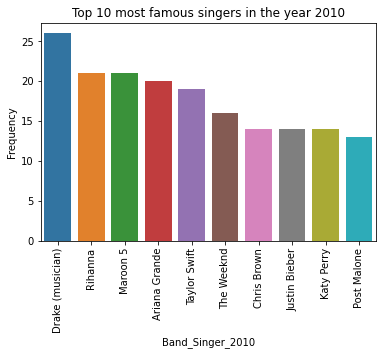

In [38]:
 #Plotting Graph 
import seaborn as sns
%matplotlib inline

sns.barplot(top_singers_2010.index, top_singers_2010.values)
plt.xticks(rotation=90)
plt.xlabel('Band_Singer_2010')
plt.ylabel('Frequency')
plt.title("Top 10 most famous singers in the year 2010");

The most ranked singers in the year 2010

## SUBMISSION DATE: 2nd April 2022 